
# <span style="color:rgb(213,80,0)">This script generates Figure 6</span>

Figure 6 summarises information on the simulated quantiles of the Kolmogorv\-Smirnov (KS) and Anderson Darling (AD) statistics on the radius process. These quantiles are used critical values for the tests discussed in the paper. The quantiles are available as:


\- matlab binary variable ksad.mat;


\- csv file ksad.csv;


The data were previously stored in a file '20240620.csv' (from thegeneration date), and can be also loaded with:


data = importdata('./aux/20240620.csv');


cols = data.colheaders;


data = data.data;


The estimated quantiles were simulated for these parameter combinations:


p     = 2:10


nu   = \[0, 3:10, 15, 20, 30, 40, 50\]


n    = \[50, 63, 79, 100, 126, 158, 199, 251, 316, 398, 501, 632, 795, 1001, 1261, 1588, 2000\]


alpha    = \[0:0.005:0.025 0.05:0.025:0.25 0.3750 0.5\]

## Data preparation

In [1]:
% Here we set the combination of v and nu that will be plotted

my_p    = 2;
my_nu   = 5;

load('ksad');
data = table2array(ksad);

% Load and prepare the data

% We do not treat the case alpha_0 < 0.05
alpha0_filter = data(:,4) >= 0.05;
data          = data(alpha0_filter,:);

% We do not treat the case n < 300
n_filter = data(:,3) >= 300;
data     = data(n_filter,:);

% Extract the variables
p       = data(:,1);
nu      = data(:,2);
n       = log(data(:,3));
alpha   = data(:,4);
KS      = data(:,5);
AD      = data(:,6);
h       = data(:,7);

% ii are the rows to be chosen for the selected p and nu
ii = and(p==my_p , nu == my_nu);

% parameter values covered by the estimated percentiles in ksad
v_all       = unique(p);
nu_all      = unique(nu);
n_all       = unique(n);
alpha_all   = unique(alpha);

% global parameters for figures
def_fontsize = 16;
tit_fontsize = 24;
lab_fontsize = 20;
mycolormap = 'sky';

## AD or KS for various values of n (bottom panels of Figure 6)


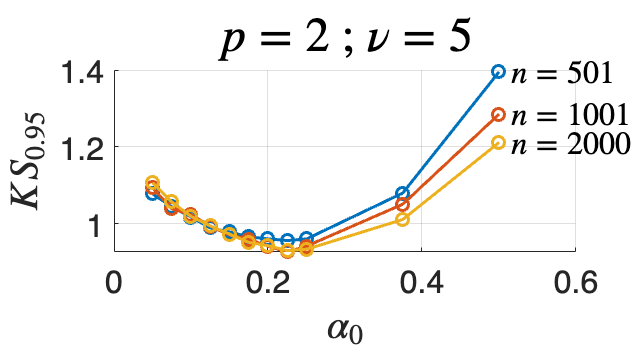

In [2]:
hfigKS = figure('Position',[487 355 758 420]);
for i=1:numel(n_all)

    if mod(i,3)==0
        current_n = n_all(i);
        i_n = and(n==current_n , ii);

        % Extract data for a given n
        alpha_values = alpha(i_n);
        ks_values    = KS(i_n);

        % Create figure 2: Test Statistics vs Alpha for each n
        % First subplot for KS and AD statistics
        plot(alpha_values, ks_values, '-o', 'LineWidth', 1.5, 'DisplayName', 'KS Statistic');
        set(gca,'FontSize',def_fontsize);

        ylabel(' $KS_{0.95}$ ' ,'Interpreter','Latex','FontSize',lab_fontsize);
        xlabel(' $\alpha_0$ '  ,'Interpreter','Latex','FontSize',lab_fontsize);
        text(alpha_values(end),ks_values(end),[' $\; n=' num2str(exp(current_n)) '$ '],'Interpreter','Latex','FontSize',def_fontsize);

        title([' $p = ' num2str(my_p) '$ ; $\nu = ' num2str(my_nu) '$ '],'Interpreter','Latex','FontSize',tit_fontsize);
        grid on;
        %legend('Location', 'northwest');
    end
    hold on;
end
hold off;


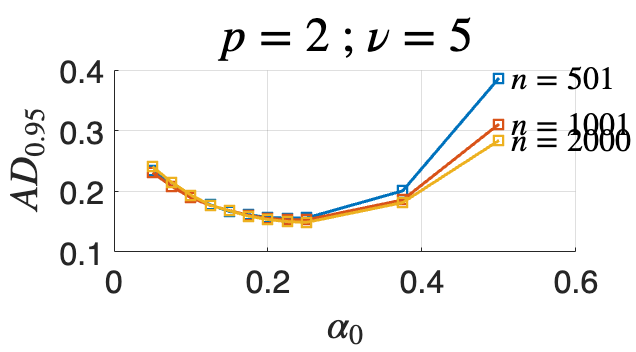

In [3]:

hfigAD = figure('Position',[487 355 758 420]);
for i=1:numel(n_all)

    if mod(i,3)==0
        current_n = n_all(i);
        i_n = and(n==current_n , ii);

        % Extract data for a given n
        alpha_values = alpha(i_n);
        ad_values    = AD(i_n);

        % Create figure 2: Test Statistics vs Alpha for each n
        % First subplot for KS and AD statistics
        plot(alpha_values, ad_values, '-s', 'LineWidth', 1.5, 'DisplayName', 'AD Statistic');
        set(gca,'FontSize',def_fontsize);
        ylabel(' $AD_{0.95}$ ','Interpreter','Latex','FontSize',lab_fontsize);
        xlabel(' $\alpha_0$ '  ,'Interpreter','Latex','FontSize',lab_fontsize);
        text(alpha_values(end),ad_values(end),[' $\; n=' num2str(exp(current_n)) '$ '],'Interpreter','Latex','FontSize',def_fontsize);

        title([' $p = ' num2str(my_p) '$ ; $\nu = ' num2str(my_nu) '$ '],'Interpreter','Latex','FontSize',tit_fontsize);
        grid on;
    end
    hold on;
end
hold off;

## AD and KS for various values of n (top panels of Figure 6)


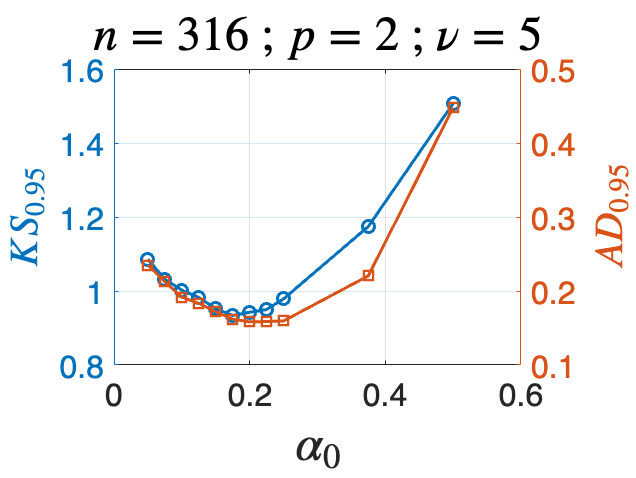


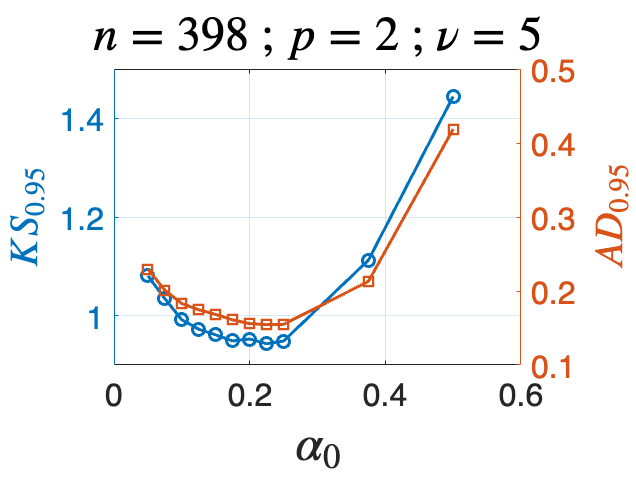

In [4]:
ii = and(p==my_p , nu == my_nu);

for i=1:numel(n_all)

    current_n = n_all(i);
    i_n = and(n==current_n , ii);

    % Extract data for a given n
    alpha_values = alpha(i_n);
    ks_values    = KS(i_n);
    ad_values    = AD(i_n);

    figure;

    yyaxis left
    plot(alpha_values, ks_values, '-o', 'LineWidth', 1.5, 'DisplayName', 'KS_{0.95}');
    hy1=ylabel(' $KS_{0.95}$ ','Interpreter','Latex');

    yyaxis right
    plot(alpha_values, ad_values, '-s', 'LineWidth', 1.5, 'DisplayName', 'AD_{0.95}');
    hy2=ylabel(' $AD_{0.95}$ ','Interpreter','Latex');

    ax = gca;
    ax.YAxis(1).FontSize = def_fontsize;
    ax.YAxis(2).FontSize = def_fontsize;
    ax.XAxis.FontSize    = def_fontsize;
    hy1.FontSize = lab_fontsize;
    hy2.FontSize = lab_fontsize;

    xlabel(' $\alpha_0$ ','Interpreter','Latex','FontSize',lab_fontsize+5);
    title([' $n = '  , num2str(exp(current_n)) , '$ ; $p = ' num2str(my_p) '$ ; $\nu = ' num2str(my_nu) '$ '],'Interpreter','Latex','FontSize',tit_fontsize);
    grid on;

end

<center>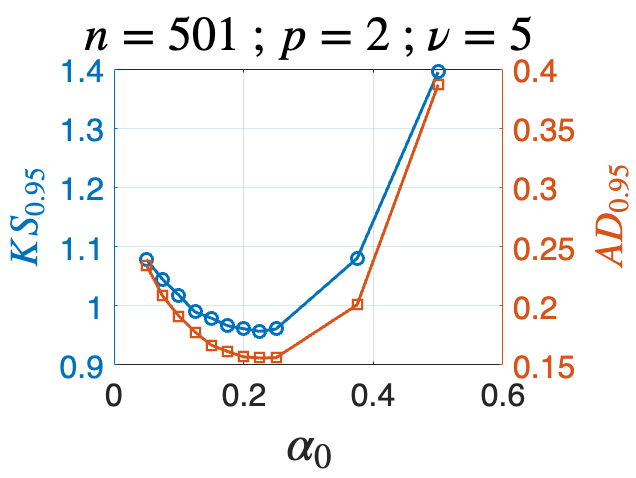</center>


<center>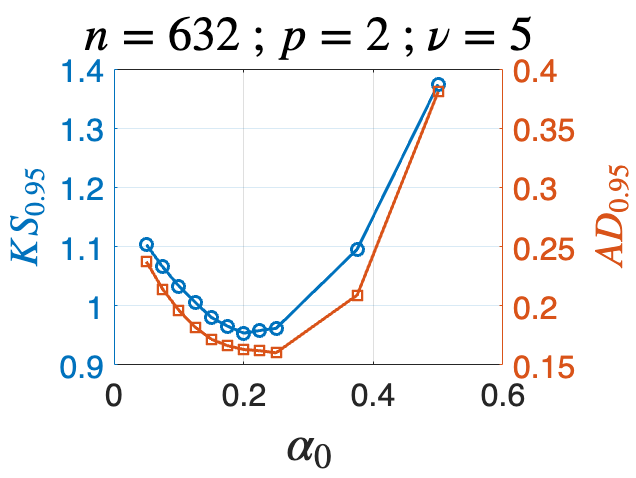</center>


<center>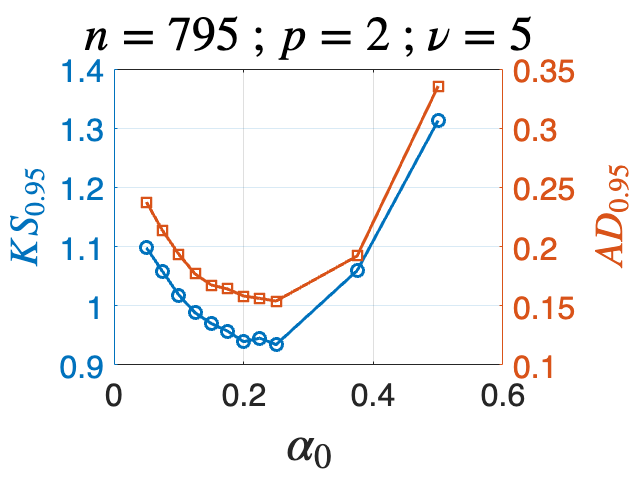</center>


<center>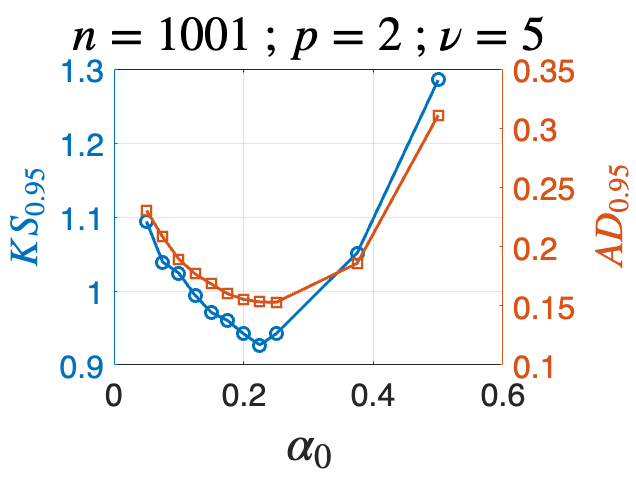</center>


<center>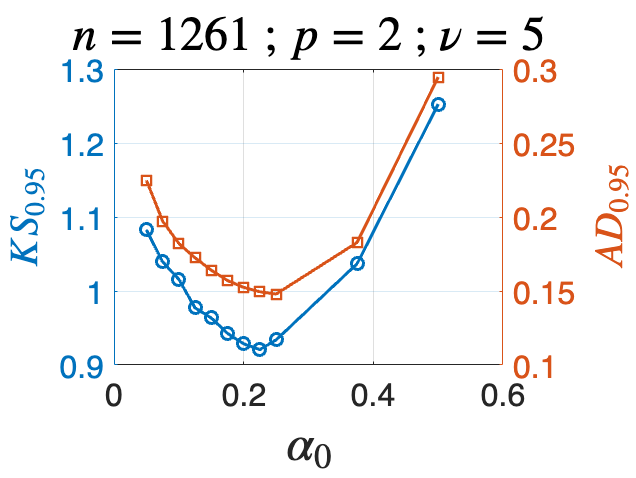</center>


<center>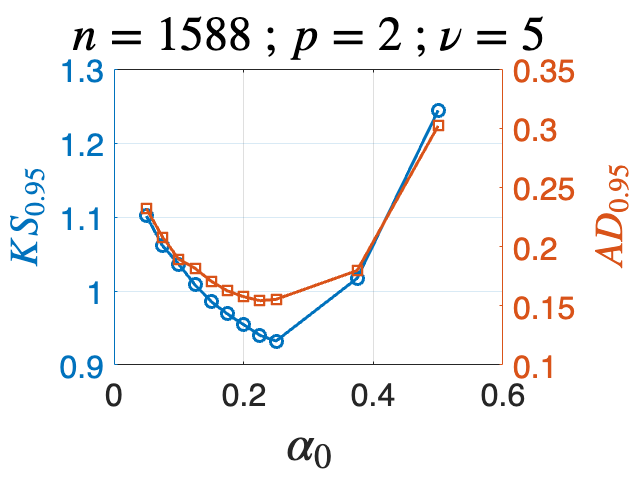</center>


<center>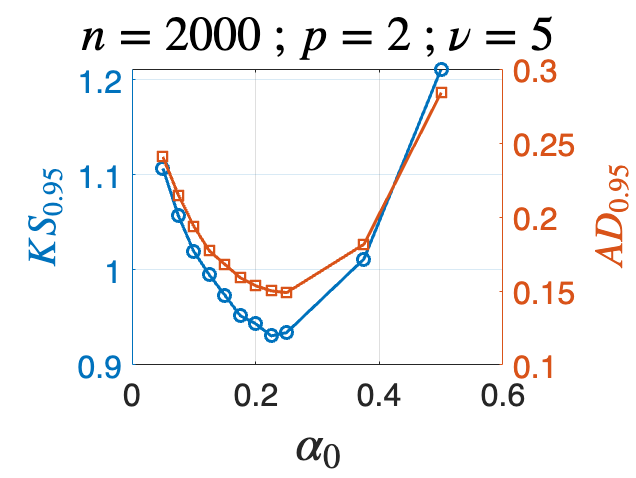</center>



In [5]:

%{
    % Additional plots, not covered by the paper
    %
    % Mesh plot of KS or AD for values of n and alpha

    stats = {'KS' , 'AD'};
    for istat = 1:2
        my_stat_label = stats{istat};
        if isequal(my_stat_label,'KS')
            my_stat = KS;
        elseif isequal(my_stat_label,'AD')
            my_stat = AD;
        else
            error('non existent statistic');
        end
        % the rows to be chosen for the given v, and nu
        ii = and(p==my_p , nu == my_nu);

        % Create a regular grid for interpolation
        n_range     = linspace(min(n(ii)), max(n(ii)), 30);
        alpha_range = linspace(min(alpha(ii)), max(alpha(ii)), 30);
        [N, A]      = meshgrid(n_range, alpha_range);
        % Interpolate the values onto the regular grid
        my_stat_grid = griddata(n(ii), alpha(ii), my_stat(ii), N, A, 'cubic');

        % Create figure 1: Surface plot with mesh
        figure;
        mesh(N, A, my_stat_grid);
        %ylim([alpha_range(1),alpha_range(end)]);
        hold on
        surf(N, A, my_stat_grid, 'FaceAlpha', 0.5);
        colormap(mycolormap);
        hold off
        set(gca,'FontSize',def_fontsize);

        % Customize the plot
        xlabel(' !!!EQ_17!!! ','Interpreter','Latex','FontSize',lab_fontsize);
        ylabel(' !!!EQ_2!!! ','Interpreter','Latex','FontSize',lab_fontsize);
        zlabel([my_stat_label , ' Statistic'],'Interpreter','Latex','FontSize',lab_fontsize);
        title( [' !!!EQ_19!!! ' ' ;  !!!EQ_20!!! '],'Interpreter','Latex','FontSize',tit_fontsize);
        %colorbar;
        grid on;
        % Adjust the view
        view(45, 30);

        % Make it pretty
        % set(findall(gcf,'-property','FontSize'),'FontSize',my_fontsize);

        % Create figure 2: Contour plot
        figure;

        contourf(N, A, my_stat_grid, 20, 'LineColor', 'k');
        hold on
        % Plot original data points
        scatter(n(ii), alpha(ii), my_stat(ii), 'filled', 'MarkerEdgeColor', 'k');
        colormap(mycolormap);
        %colorbar;
        grid on;
        hold off
        set(gca,'fontsize',def_fontsize);

        % Customize the contour plot
        xlabel(' !!!EQ_17!!! ' ,'Interpreter','Latex','FontSize',lab_fontsize);
        ylabel(' !!!EQ_2!!! ','Interpreter','Latex','FontSize',lab_fontsize);
        title([my_stat_label ':  ' ' !!!EQ_19!!!  ;  !!!EQ_20!!! '],'Interpreter','Latex','FontSize',tit_fontsize);

        % Make it pretty
        %set(findall(gcf,'-property','FontSize'),'FontSize',my_fontsize);

    end

%}




## Figure 1 of Supplementary Information: AD or KS for various values of n
### Data preparation

In [6]:

my_p    = 2;
my_nu   = 50;

load('ksad');
data = table2array(ksad);

% Load and prepare the data

% We do not treat the case alpha_0 < 0.05
alpha0_filter = data(:,4) >= 0.05;
data          = data(alpha0_filter,:);

% We do not treat the case n < 300
n_filter = data(:,3) >= 300;
data     = data(n_filter,:);

% Extract the variables
p       = data(:,1);
nu      = data(:,2);
n       = log(data(:,3));
alpha   = data(:,4);
KS      = data(:,5);
AD      = data(:,6);
h       = data(:,7);

% ii are the rows to be chosen for the selected p and nu
ii = and(p==my_p , nu == my_nu);

% parameter values covered by the estimated percentiles in ksad
v_all       = unique(p);
nu_all      = unique(nu);
n_all       = unique(n);
alpha_all   = unique(alpha);

% global parameters for figures
def_fontsize = 16;
tit_fontsize = 24;
lab_fontsize = 20;
mycolormap = 'sky';


### Figures generation


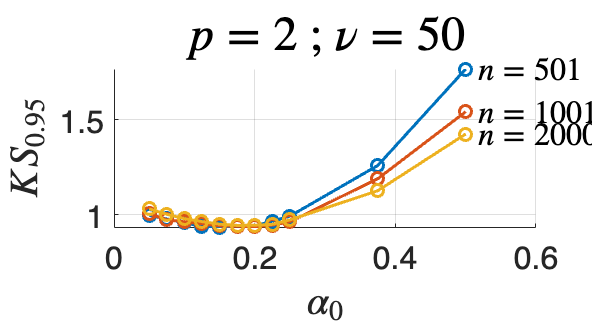

In [7]:

hfigKS_SI = figure('Position',[487 355 758 420]);
for i=1:numel(n_all)

    if mod(i,3)==0
        current_n = n_all(i);
        i_n = and(n==current_n , ii);

        % Extract data for a given n
        alpha_values = alpha(i_n);
        ks_values    = KS(i_n);

        % Create figure 2: Test Statistics vs Alpha for each n
        % First subplot for KS and AD statistics
        plot(alpha_values, ks_values, '-o', 'LineWidth', 1.5, 'DisplayName', 'KS Statistic');
        set(gca,'FontSize',def_fontsize);

        ylabel(' $KS_{0.95}$ ' ,'Interpreter','Latex','FontSize',lab_fontsize);
        xlabel(' $\alpha_0$ '  ,'Interpreter','Latex','FontSize',lab_fontsize);
        text(alpha_values(end),ks_values(end),[' $\; n=' num2str(exp(current_n)) '$ '],'Interpreter','Latex','FontSize',def_fontsize);

        title([' $p = ' num2str(my_p) '$ ; $\nu = ' num2str(my_nu) '$ '],'Interpreter','Latex','FontSize',tit_fontsize);
        grid on;
        %legend('Location', 'northwest');
    end
    hold on;
end
hold off;


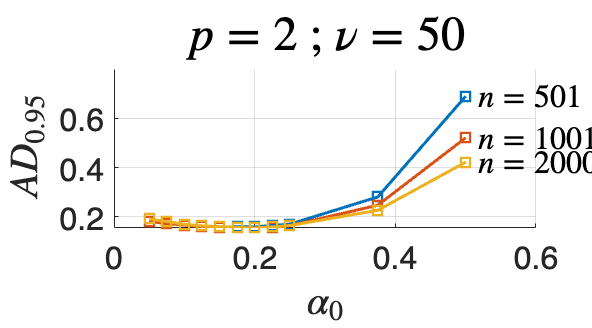

In [8]:

hfigAD_SI = figure('Position',[487 355 758 420]);
for i=1:numel(n_all)

    if mod(i,3)==0
        current_n = n_all(i);
        i_n = and(n==current_n , ii);

        % Extract data for a given n
        alpha_values = alpha(i_n);
        ad_values    = AD(i_n);

        % Create figure 2: Test Statistics vs Alpha for each n
        % First subplot for KS and AD statistics
        plot(alpha_values, ad_values, '-s', 'LineWidth', 1.5, 'DisplayName', 'AD Statistic');
        set(gca,'FontSize',def_fontsize);
        ylabel(' $AD_{0.95}$ ','Interpreter','Latex','FontSize',lab_fontsize);
        xlabel(' $\alpha_0$ '  ,'Interpreter','Latex','FontSize',lab_fontsize);
        text(alpha_values(end),ad_values(end),[' $\; n=' num2str(exp(current_n)) '$ '],'Interpreter','Latex','FontSize',def_fontsize);

        title([' $p = ' num2str(my_p) '$ ; $\nu = ' num2str(my_nu) '$ '],'Interpreter','Latex','FontSize',tit_fontsize);
        grid on;
    end
    hold on;
end
hold off;